In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Melbourne_housing_FULL.csv')

In [202]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [203]:
df.shape

(34857, 21)

Exercice 1

In [204]:
df1 = df.dropna(subset=['Price'])
df1['Price'] = df1['Price'].astype(int)

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_5096\911571672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price'] = df1['Price'].astype(int)


In [205]:
100 - df1.shape[0]/df.shape[0]*100

21.83205668875692

Exercice 2

In [206]:
df1['Type'].value_counts()
# the most common is house

Type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [207]:
type_common = df1['Type'].mode()[0]
(df1['Type'].value_counts()[type_common] / df1.shape[0])*100

67.79461959114765

Exercice 3

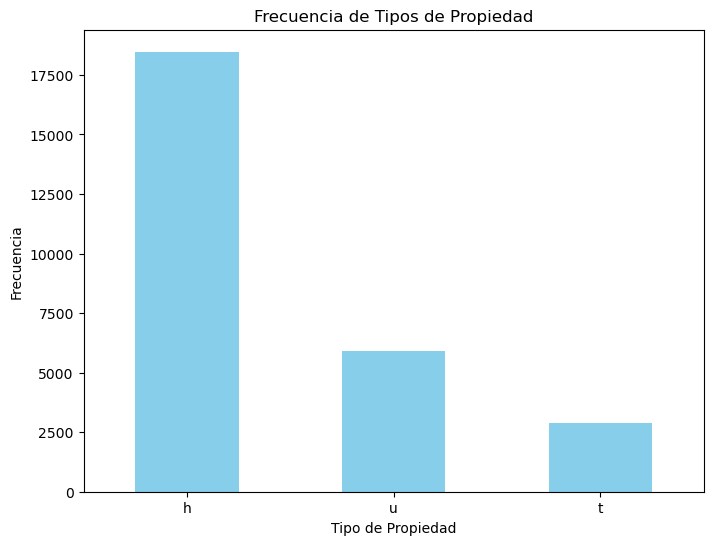

In [208]:
# Contar la frecuencia de cada tipo de propiedad (Type)
type_counts = df1['Type'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
type_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Tipos de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

Exercice 4

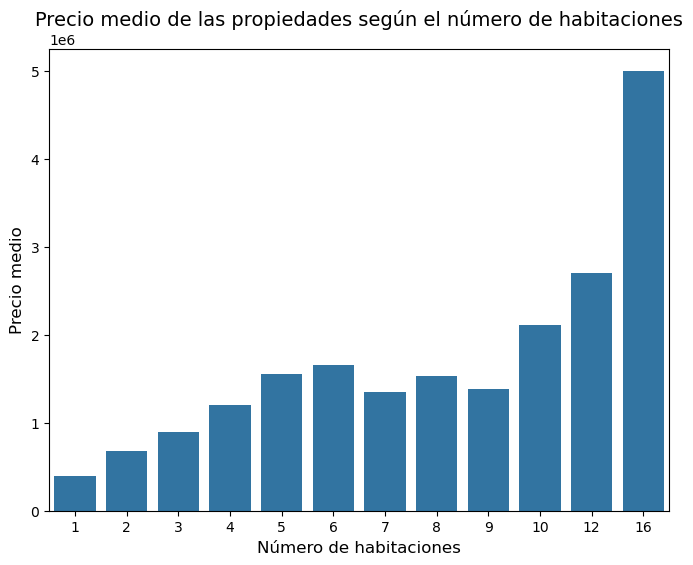

In [209]:
# Calcular el precio medio por número de habitaciones
precio_medio_por_habitacion = df1.groupby('Rooms')['Price'].median().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Rooms', y='Price', data=precio_medio_por_habitacion)

# Añadir etiquetas y título
plt.title('Precio medio de las propiedades según el número de habitaciones', fontsize=14)
plt.xlabel('Número de habitaciones', fontsize=12)
plt.ylabel('Precio medio', fontsize=12)
plt.show()

Exercice 5

In [210]:
from scipy.stats import spearmanr

In [211]:
coef_spearman, p_value = spearmanr(df1['Rooms'], df1['Price'])

print(f"Coeficiente de correlación de Spearman: {coef_spearman:.3f}")
print(f"Valor p: {p_value:.3f}")

Coeficiente de correlación de Spearman: 0.504
Valor p: 0.000


Exercice 6

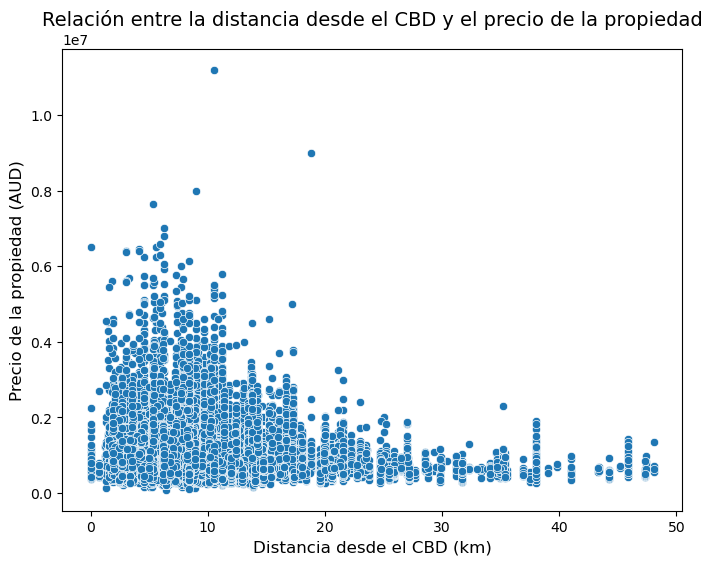

Coeficiente de correlación de Spearman: -0.188
Valor p: 0.000


In [212]:
df6 = df.dropna(subset=['Price', 'Distance'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance', y='Price', data=df6)
plt.title('Relación entre la distancia desde el CBD y el precio de la propiedad', fontsize=14)
plt.xlabel('Distancia desde el CBD (km)', fontsize=12)
plt.ylabel('Precio de la propiedad (AUD)', fontsize=12)
plt.show()

# Calcular el coeficiente de correlación de Spearman
coef_spearman, p_value = spearmanr(df6['Distance'], df6['Price'])

# Mostrar el resultado
print(f"Coeficiente de correlación de Spearman: {coef_spearman:.3f}")
print(f"Valor p: {p_value:.3f}")

Exercice 7

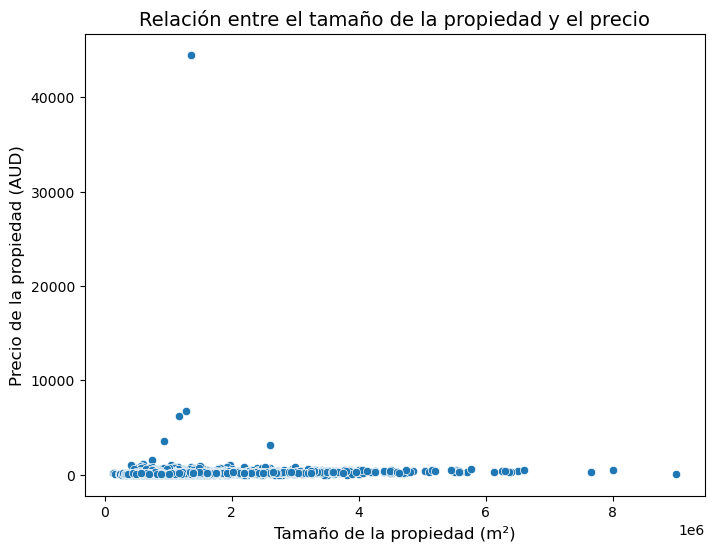

Coeficiente de correlación de Spearman: 0.555
Valor p: 0.000


In [213]:
# Eliminar filas con valores nulos en 'Price' y 'BuildingArea'
df7 = df.dropna(subset=['Price', 'BuildingArea'])

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='BuildingArea', data=df7)
plt.title('Relación entre el tamaño de la propiedad y el precio', fontsize=14)
plt.xlabel('Tamaño de la propiedad (m²)', fontsize=12)
plt.ylabel('Precio de la propiedad (AUD)', fontsize=12)
plt.show()

# Calcular el coeficiente de correlación de Spearman
coef_spearman, p_value = spearmanr(df7['BuildingArea'], df7['Price'])

# Mostrar el resultado
print(f"Coeficiente de correlación de Spearman: {coef_spearman:.3f}")
print(f"Valor p: {p_value:.3f}")

Exercice 8

In [214]:
df1.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_5096\592743961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['LandSize_Q'] = pd.qcut(df8['Landsize'], q=7)
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_5096\592743961.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_por_landsize = df8.groupby('LandSize_Q')['Price'].mean().reset_index()
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_5096\592743961.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

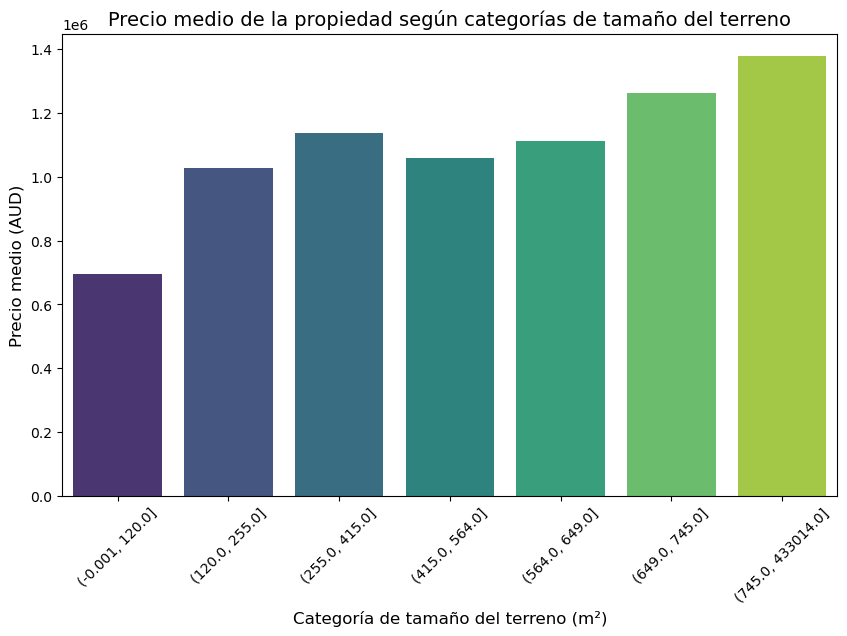

In [215]:
# Eliminar filas con valores nulos en 'Price' y 'LandSize'
df8 = df.dropna(subset=['Price', 'Landsize'])

# Discretizar 'LandSize' en 7 grupos (cuantiles)
df8['LandSize_Q'] = pd.qcut(df8['Landsize'], q=7)

# Calcular el precio medio por grupo de tamaño de terreno
precio_medio_por_landsize = df8.groupby('LandSize_Q')['Price'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='LandSize_Q', y='Price', data=precio_medio_por_landsize, palette='viridis')

# Añadir etiquetas y título
plt.title('Precio medio de la propiedad según categorías de tamaño del terreno', fontsize=14)
plt.xlabel('Categoría de tamaño del terreno (m²)', fontsize=12)
plt.ylabel('Precio medio (AUD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Exercice 9

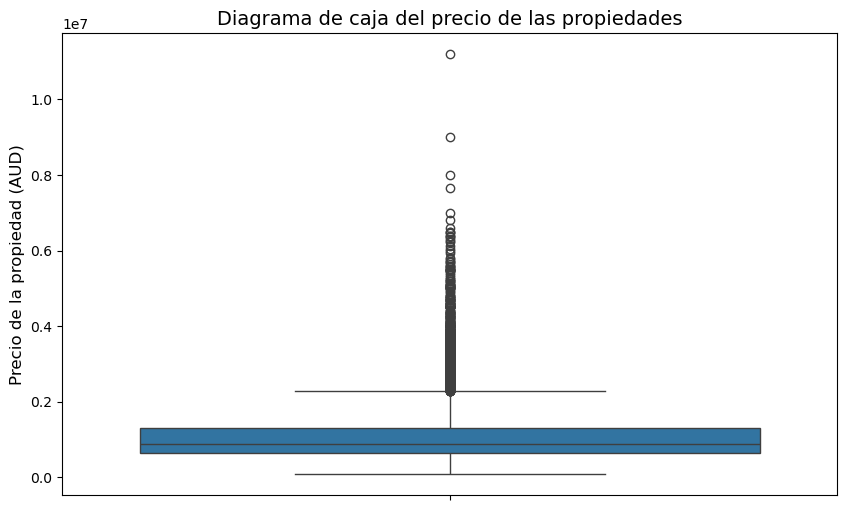

Porcentaje de propiedades identificadas como valores atípicos: 4.69%


In [216]:
# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['Price'])
plt.title('Diagrama de caja del precio de las propiedades', fontsize=14)
plt.ylabel('Precio de la propiedad (AUD)', fontsize=12)
plt.show()

# Calcular los límites de Tukey para identificar outliers
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df1[(df1['Price'] < lower_bound) | (df1['Price'] > upper_bound)]
df_sin_outliers = df1[(df1['Price'] >= lower_bound) & (df1['Price'] <= upper_bound)]

# Calcular el porcentaje de propiedades identificadas como outliers
porcentaje_outliers = (len(outliers) / len(df1)) * 100

# Mostrar el porcentaje
print(f"Porcentaje de propiedades identificadas como valores atípicos: {porcentaje_outliers:.2f}%")

Exercice 10

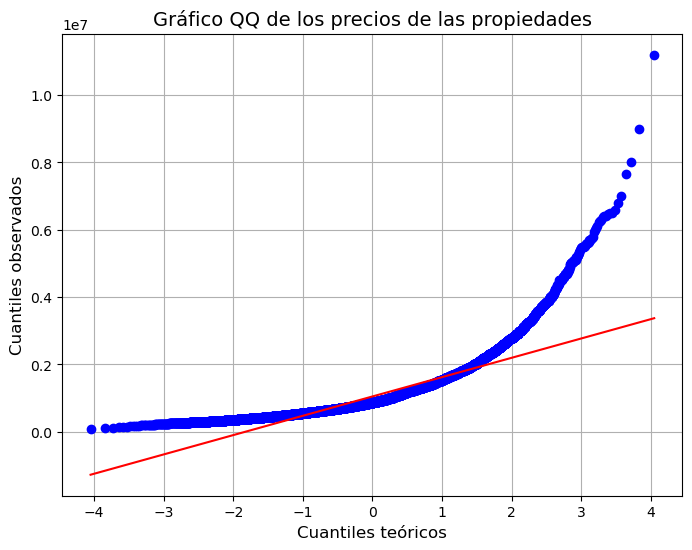

Asimetría: 2.589
Curtosis: 13.097


In [217]:
import numpy as np
import scipy.stats as stats

# Crear un gráfico QQ
plt.figure(figsize=(8, 6))
stats.probplot(df1['Price'], dist="norm", plot=plt)
plt.title('Gráfico QQ de los precios de las propiedades', fontsize=14)
plt.xlabel('Cuantiles teóricos', fontsize=12)
plt.ylabel('Cuantiles observados', fontsize=12)
plt.grid()
plt.show()

# Calcular asimetría y curtosis
asimetria = df1['Price'].skew()
curtosis = df1['Price'].kurtosis()

# Mostrar resultados
print(f"Asimetría: {asimetria:.3f}")
print(f"Curtosis: {curtosis:.3f}")

Exercice 11

In [218]:
from scipy.stats import kstest

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(df1['Price'], 'norm', args=(df1['Price'].mean(), df1['Price'].std()))

# Mostrar resultados
print(f"Estadística KS: {ks_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

Estadística KS: 0.138
Valor p: 0.000


Exercice 12

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_5096\1427285016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=df1, palette='Set2')


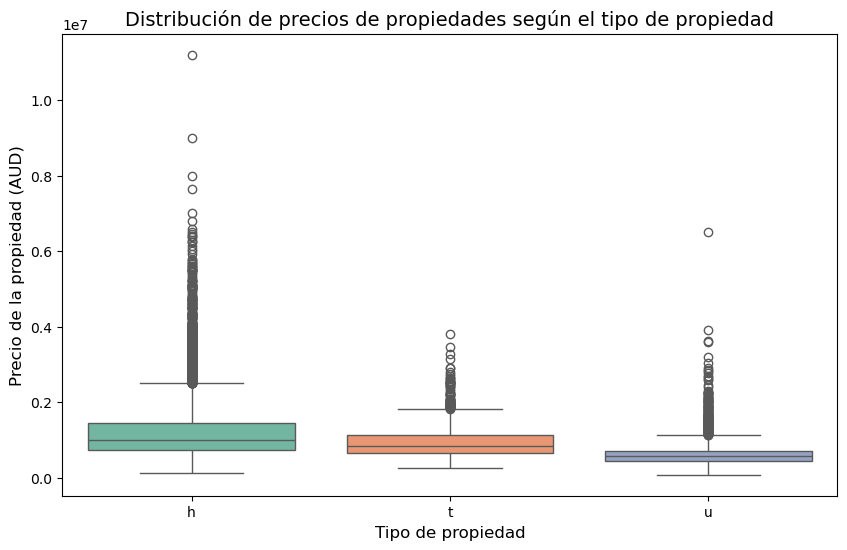

In [219]:
# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df1, palette='Set2')
plt.title('Distribución de precios de propiedades según el tipo de propiedad', fontsize=14)
plt.xlabel('Tipo de propiedad', fontsize=12)
plt.ylabel('Precio de la propiedad (AUD)', fontsize=12)
plt.show()

Exercice 13

In [220]:
# Calcular el precio medio por suburbio
precio_medio_por_suburbio = df1.groupby('Regionname')['Price'].median().reset_index()

# Encontrar la región con el precio medio más alto y más bajo
region_max = precio_medio_por_suburbio.loc[precio_medio_por_suburbio['Price'].idxmax()]
region_min = precio_medio_por_suburbio.loc[precio_medio_por_suburbio['Price'].idxmin()]

# Mostrar resultados
print(f"Región con el precio medio más alto: {region_max['Regionname']} - Precio: {region_max['Price']:.2f} AUD")
print(f"Región con el precio medio más bajo: {region_min['Regionname']} - Precio: {region_min['Price']:.2f} AUD")

Región con el precio medio más alto: Southern Metropolitan - Precio: 1250000.00 AUD
Región con el precio medio más bajo: Western Victoria - Precio: 412125.00 AUD


Exercice 14

In [200]:
import numpy as np
from scipy.stats import chi2_contingency

df14 = df1.copy()

# Categorizar el precio en cinco rangos
bins = [0, 500000, 1000000, 1500000, 2000000, float('inf')]
labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '>2M']
df14['Price_Range'] = pd.cut(df14['Price'], bins=bins, labels=labels)

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df14['Regionname'], df14['Price_Range'])

# Realizar la prueba de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Calcular el coeficiente V de Cramer
n = contingency_table.sum().sum()  # Total de observaciones
phi2 = chi2_stat / n
r, k = contingency_table.shape
v_cramer = (phi2 / min(k - 1, r - 1)) ** 0.5

# Resultados
print(f"Estadística Chi-cuadrado: {chi2_stat:.2f}")
print(f"Valor p: {p_value:.4f}")
print(f"Coeficiente V de Cramer: {v_cramer:.4f}")

# Interpretación de V de Cramer
if v_cramer < 0.1:
    print("Asociación débil.")
elif 0.1 <= v_cramer < 0.3:
    print("Asociación moderada.")
else:
    print("Asociación fuerte.")

Estadística Chi-cuadrado: 5851.85
Valor p: 0.0000
Coeficiente V de Cramer: 0.2317
Asociación moderada.


Exercice 15

In [224]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [227]:
df15 = df1.copy()

# Convertir la columna 'Date' a formato datetime
df15['Date'] = pd.to_datetime(df15['Date'], format='%d/%m/%Y')

# Extraer el año de la columna 'Date'
df15['Year'] = df15['Date'].dt.year

# Calcular el precio mediano para el año más antiguo y el más reciente
earliest_year = df15['Year'].min()
latest_year = df15['Year'].max()
median_price_earliest = df15[df15['Year'] == earliest_year]['Price'].median()
median_price_latest = df15[df15['Year'] == latest_year]['Price'].median()

# Calcular el cambio porcentual
percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

# Mostrar resultados
print(f"Precio mediano en {earliest_year}: {median_price_earliest:.2f} AUD")
print(f"Precio mediano en {latest_year}: {median_price_latest:.2f} AUD")
print(f"Cambio porcentual: {percentage_change:.2f}%")

Precio mediano en 2016: 885000.00 AUD
Precio mediano en 2018: 836500.00 AUD
Cambio porcentual: -5.48%


Exercice 16

In [237]:
df16 = df1.copy()

# Convertir la columna 'Date' a formato datetime
df16['Date'] = pd.to_datetime(df16['Date'], format='%d/%m/%Y')

# Extraer el mes de la columna 'Date'
df16['Month'] = df16['Date'].dt.month

# Contar el número de ventas por mes
monthly_sales = df16['Month'].value_counts().sort_values(ascending=False)

# Mostrar resultados
print(monthly_sales)

Month
11    3408
9     3219
10    3118
5     2620
6     2425
3     2362
7     2359
8     2324
2     2067
12    1490
4     1206
1      649
Name: count, dtype: int64
